[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Behavioral-Cloning-P3/blob/master/Model.ipynb)

# Udacity Car ND : Behavioral Cloning Project

This notebook is used to build and train the model used for driving the car autonomously 


## Versions 


#### Versions 5
- Merged build and train cells. 
- Merged Load and prepare data

#### Versions 4
- Normalization and croping in the Keras Layer
- Dropout in 3 layers 0.25
- Files changed the model and the drive.py 

#### Versions 3
- Reduced the image height to concentrate on roads only.  
- the training and prediction image has changed. 

Result: The car drived well till it got distracted at road with brown road curb.  

#### Versions 2
A basic Lenet Model updated for linear regression. 


##  Workspace setup

* clean the workspace 
* download and unzip files
* list and assert files

```
date > log.txt
rm -rf *.zip  >> log.txt 2>&1
wget https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip >> log.txt 2>&1
unzip data.zip >> log.txt 2>&1
date >> log.txt 2>&1

ls
ls data
ls data/IMG | wc
```

## Steps  

* load image
* load csv file 



/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Number of training samples  8036
Image Height  160
Image Width  320
Image Channels  3
(8036, 160, 320, 3)
(8036, 1)


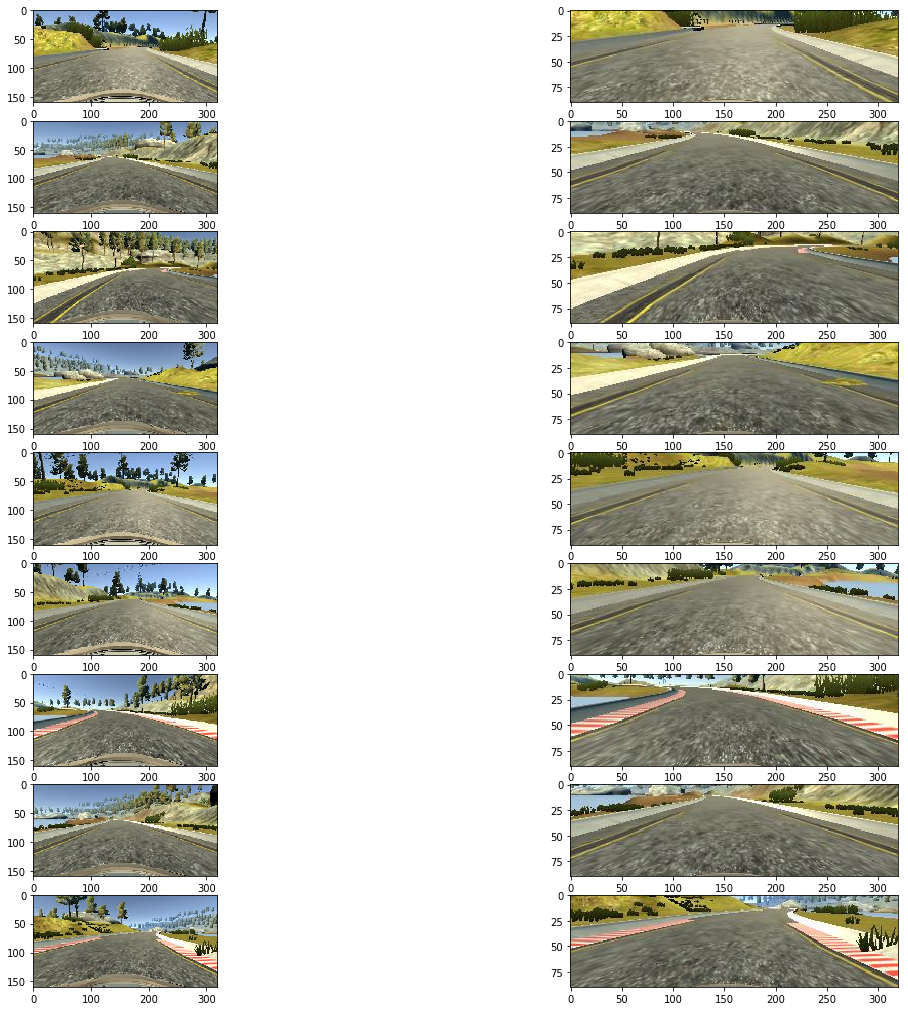

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread_collection
%matplotlib inline


images_raw = imread_collection('data/IMG/center*',conserve_memory=True)
driving_log=pd.read_csv('data/driving_log.csv', sep=',')

driving_log.describe()


X_train = np.array(images_raw)

Y_train = driving_log['steering']
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))

train_n = X_train.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

print('Number of training samples ',train_n)
print('Image Height ',image_height)
print('Image Width ',image_width)
print('Image Channels ',image_channels)

print(X_train.shape)
print(Y_train.shape)

fig=plt.figure(figsize=(20, 20))
rows,columns = 10,2

i=0

for j in range(1,rows):
    n = np.random.randint(train_n)
    
    i=i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[n])

    i=i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[n,50:140,:,:])
    
plt.show()

## Data Generators 


# Build and Train Model

* Build 
* Train 


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 316, 4)        304       
_________________________________________________________________
activation_1 (Activation)    (None, 86, 316, 4)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 158, 4)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 154, 8)        808       
_________________________________________________________________
activation_2 (Activation)    (None, 39, 154, 8)        0         
__________

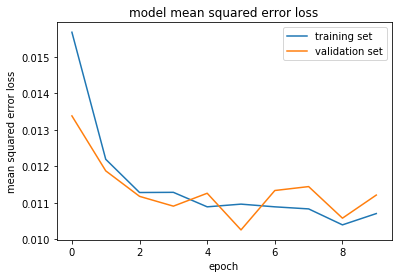

In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Cropping2D,Lambda 
from keras.callbacks import ModelCheckpoint

def get_model(input_shape) :

    model = Sequential()
    
    #Layer Normilization
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))
    
    #Layer Cropping
    model.add(Cropping2D(cropping=((50,20), (0,0))))

    #Layer Conv 1 
    model.add(Conv2D(4, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #Layer Conv 2
    model.add(Conv2D(8, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))


    #Layer Conv 3
    model.add(Conv2D(16, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Layer Dense 1
    model.add(Dense(32))
    model.add(Activation("relu"))
    model.add(Dropout(0.25))

    #Layer Dense 2
    model.add(Dense(8))
    model.add(Activation("relu"))
    model.add(Dropout(0.25))

    #Layer Dense 4
    model.add(Dense(1)) 

    model.compile(loss='mse', optimizer='adam')


    return model

model = get_model((X_train.shape[1],X_train.shape[2],X_train.shape[3]))
model.summary()

weights_filepath="weights-5.hdf5"

checkpoint = ModelCheckpoint(weights_filepath, verbose=1)

history_object = model.fit(X_train, Y_train, 
                            validation_split=0.2,
                            shuffle=True, 
                            epochs=10, 
                            batch_size=32,
                            callbacks=[checkpoint])


print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

